In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('Sample_data_of_smoking.csv')

In [3]:
df

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Glucose_Level,Body_Mass_Index,Smoking_Status,Stroke
0,Female,17.0,No,No,No,Private,Urban,92.97,NaN,formerly smoked,No
1,Female,13.0,No,No,No,children,Rural,85.81,18.6,Not Mentioned,No
2,Male,55.0,No,No,Yes,Private,Urban,89.17,31.5,never smoked,No
3,Female,42.0,No,No,No,Private,Urban,98.53,18.5,never smoked,No
4,Female,31.0,No,No,No,Private,Urban,108.89,52.3,Not Mentioned,No
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,57.0,Yes,No,Yes,Private,Rural,129.54,60.9,smokes,No
5106,Female,19.0,No,No,No,Private,Urban,90.57,24.2,Not Mentioned,No
5107,Female,45.0,No,No,Yes,Private,Urban,172.33,45.3,formerly smoked,No
5108,Female,53.0,Yes,No,Yes,Private,Urban,62.55,30.3,Not Mentioned,Yes


In [4]:
df.shape

(5110, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           5110 non-null   object 
 1   Age              5110 non-null   float64
 2   Hypertension     5110 non-null   object 
 3   Heart_Disease    5110 non-null   object 
 4   Ever_Married     5110 non-null   object 
 5   Work_Type        5110 non-null   object 
 6   Residence_Type   5110 non-null   object 
 7   Glucose_Level    5110 non-null   float64
 8   Body_Mass_Index  4909 non-null   float64
 9   Smoking_Status   5110 non-null   object 
 10  Stroke           5110 non-null   object 
dtypes: float64(3), object(8)
memory usage: 439.3+ KB


In [6]:
df.describe()

,Age,Glucose_Level,Body_Mass_Index
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [7]:
df.duplicated().any()

False

In [8]:
df.isnull().any()

Gender             False
Age                False
Hypertension       False
Heart_Disease      False
Ever_Married       False
Work_Type          False
Residence_Type     False
Glucose_Level      False
Body_Mass_Index     True
Smoking_Status     False
Stroke             False
dtype: bool

In [9]:
#number of null values as per column
df.isnull().sum()

Gender               0
Age                  0
Hypertension         0
Heart_Disease        0
Ever_Married         0
Work_Type            0
Residence_Type       0
Glucose_Level        0
Body_Mass_Index    201
Smoking_Status       0
Stroke               0
dtype: int64

In [10]:
#percentage of null value respect to column
df.isnull().sum()/len(df)*100

Gender             0.000000
Age                0.000000
Hypertension       0.000000
Heart_Disease      0.000000
Ever_Married       0.000000
Work_Type          0.000000
Residence_Type     0.000000
Glucose_Level      0.000000
Body_Mass_Index    3.933464
Smoking_Status     0.000000
Stroke             0.000000
dtype: float64

### cleaning columns

In [11]:
df['Body_Mass_Index'].unique()

array([ nan, 18.6, 31.5, 18.5, 52.3, 26.2, 42.2, 28.8, 27.6, 37.6, 31.4,
       27.2, 17.5, 31.6, 24.9, 39.7, 36.4, 28.4, 28.9, 25.7, 26.8, 41.3,
       37. , 24.1, 23.9, 31. , 26.6, 23.1, 20.9, 21.4, 71.9, 36.2, 20.1,
       22.8, 40.1, 22.2, 26.5, 24.3, 44.7, 30.4, 34.3, 20.7, 33.1, 27.3,
       37.8, 23.4, 29.5, 22.4, 24.2, 17. , 32.2, 23.3, 30. , 28.7, 21.3,
       26.7, 22.1, 39.3, 27.1, 38.8, 28.5, 18.9, 40.8, 60.2, 21.5, 16.3,
       23.5, 30.1, 22.7, 42.6, 35.9, 26.1, 43. , 24. , 47.6, 54.7, 29.9,
       50.2, 31.7, 42.8, 38. , 29.6, 27.5, 29.7, 32.9, 31.2, 35.3, 30.9,
       31.9, 24.7, 33.5, 28.1, 36. , 29.8, 36.1, 32.3, 24.4, 21.1, 34.5,
       22.6, 32. , 31.8, 33.7, 28.2, 18. , 37.7, 27. , 29. , 30.2, 25.8,
       20.2, 29.4, 32.4, 16.7, 32.1, 57.3, 23.8, 17.3, 35.8, 22.9, 18.1,
       30.5, 32.7, 27.8, 17.1, 54.6, 18.3, 55.1, 33. , 11.3, 29.1, 39.5,
       23.6, 23.7, 23.2, 20.4, 44.3, 34.2, 39.4, 57.5, 20.5, 40.2, 34.1,
       24.6, 52.7, 32.8, 15.3, 21.2, 26.9, 26. , 48

In [12]:
#Count of null value of column
df['Body_Mass_Index'].isnull().sum()

201

In [18]:
df['Body_Mass_Index'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: Body_Mass_Index, dtype: float64

In [19]:
#drop rows with null values 
df.dropna(inplace=True)

In [22]:
# count of null values in body mass index column
df['Body_Mass_Index'].isnull().sum()

0

In [23]:
df.isnull().any()

Gender             False
Age                False
Hypertension       False
Heart_Disease      False
Ever_Married       False
Work_Type          False
Residence_Type     False
Glucose_Level      False
Body_Mass_Index    False
Smoking_Status     False
Stroke             False
dtype: bool

In [24]:
df.describe()

,Age,Glucose_Level,Body_Mass_Index
count,4909.000000,4909.000000,4909.000000
mean,42.865374,105.305150,28.893237
std,22.555115,44.424341,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.070000,23.500000
50%,44.000000,91.680000,28.100000
75%,60.000000,113.570000,33.100000
max,82.000000,271.740000,97.600000


In [25]:
df.columns

Index(['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Glucose_Level', 'Body_Mass_Index',
       'Smoking_Status', 'Stroke'],
      dtype='object')

In [26]:
df

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Glucose_Level,Body_Mass_Index,Smoking_Status,Stroke
1,Female,13.0,No,No,No,children,Rural,85.81,18.6,Not Mentioned,No
2,Male,55.0,No,No,Yes,Private,Urban,89.17,31.5,never smoked,No
3,Female,42.0,No,No,No,Private,Urban,98.53,18.5,never smoked,No
4,Female,31.0,No,No,No,Private,Urban,108.89,52.3,Not Mentioned,No
6,Female,24.0,No,No,No,Private,Urban,97.55,26.2,never smoked,No
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,57.0,Yes,No,Yes,Private,Rural,129.54,60.9,smokes,No
5106,Female,19.0,No,No,No,Private,Urban,90.57,24.2,Not Mentioned,No
5107,Female,45.0,No,No,Yes,Private,Urban,172.33,45.3,formerly smoked,No
5108,Female,53.0,Yes,No,Yes,Private,Urban,62.55,30.3,Not Mentioned,Yes


# Average of glucose level as per gender and with their smoking status

In [27]:
#Average gulcose lavel of persons who smokes
df.Glucose_Level[(df['Smoking_Status'] == 'smokes')].mean()

106.46569877883309

In [28]:
#Average gulcose lavel of persons who never smoked
df.Glucose_Level[(df['Smoking_Status'] == 'never smoked')].mean()

107.13621490280775

In [29]:
#Average gulcose lavel of persons who smoked formerly
df.Glucose_Level[(df['Smoking_Status'] == 'formerly smoked')].mean()

112.57982078853047

### Male

In [30]:
#Average gulcose lavel of male who smokes
df.Glucose_Level[(df['Gender'] == 'Male')&(df['Smoking_Status'] == 'smokes')].mean()

107.10496794871786

In [31]:
#Average gulcose lavel of male who never smoked
df.Glucose_Level[(df['Gender'] == 'Male')&(df['Smoking_Status'] == 'never smoked')].mean()

109.38400616332818

In [32]:
#Average gulcose lavel of male who smoked formerly
df.Glucose_Level[(df['Gender'] == 'Male')&(df['Smoking_Status'] == 'formerly smoked')].mean()

122.26510582010582

### Female

In [33]:
#Average gulcose lavel of female who smokes
df.Glucose_Level[(df['Gender'] == 'Female')&(df['Smoking_Status'] == 'smokes')].mean()

105.99640000000005

In [34]:
#Average gulcose lavel of female who never smoked
df.Glucose_Level[(df['Gender'] == 'Female')&(df['Smoking_Status'] == 'never smoked')].mean()

105.92356608478813

In [35]:
#Average gulcose lavel of male who smoked formerly
df.Glucose_Level[(df['Gender'] == 'Female')&(df['Smoking_Status'] == 'formerly smoked')].mean()

104.60370370370373

# Average of body mass index as per gender and with their smoking status

In [36]:
#Average body mass index of persons who smokes
df.Body_Mass_Index[(df['Smoking_Status'] == 'smokes')].mean()

30.54355495251017

In [37]:
#Average body mass index of persons who never smoked
df.Body_Mass_Index[(df['Smoking_Status'] == 'never smoked')].mean()

29.98255939524838

In [38]:
#Average body mass index of persons who smoked formerly
df.Body_Mass_Index[(df['Smoking_Status'] == 'formerly smoked')].mean()

30.74719235364395

### Male

In [39]:
#Average body mass index of male who smokes
df.Body_Mass_Index[(df['Gender'] == 'Male')&(df['Smoking_Status'] == 'smokes')].mean()

30.261858974358983

In [40]:
#Average body mass index of male who never smoked
df.Body_Mass_Index[(df['Gender'] == 'Male')&(df['Smoking_Status'] == 'never smoked')].mean()

30.20477657935283

In [41]:
#Average body mass index of male who smoked formerly
df.Body_Mass_Index[(df['Gender'] == 'Male')&(df['Smoking_Status'] == 'formerly smoked')].mean()

30.928571428571413

### Female

In [42]:
#Average body mass index of female who smokes
df.Body_Mass_Index[(df['Gender'] == 'Female')&(df['Smoking_Status'] == 'smokes')].mean()

30.75035294117645

In [43]:
#Average body mass index of female who never smoked
df.Body_Mass_Index[(df['Gender'] == 'Female')&(df['Smoking_Status'] == 'never smoked')].mean()

29.86267664172902

In [44]:
#Average body mass index of male who smoked formerly
df.Body_Mass_Index[(df['Gender'] == 'Female')&(df['Smoking_Status'] == 'formerly smoked')].mean()

30.597821350762548

## Age wise analysis

In [50]:
#Count of peoples who smokes and their age is less than 18
df[(df['Age'] < 18)&(df['Smoking_Status']=='smokes')]['Gender'].count()

9

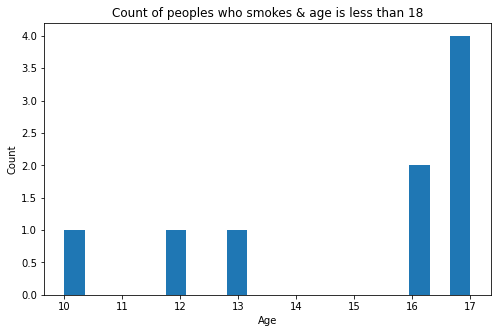

In [51]:
plt.figure(figsize=(8,5))
df.Age[(df['Age'] < 18)&(df['Smoking_Status']=='smokes')].plot(kind='hist',bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count of peoples who smokes & age is less than 18")
plt.show()

In [53]:
#Count of peoples who smokes and their age is greater than 60
df[(df['Age'] > 60)&(df['Smoking_Status']=='smokes')]['Gender'].count()

159

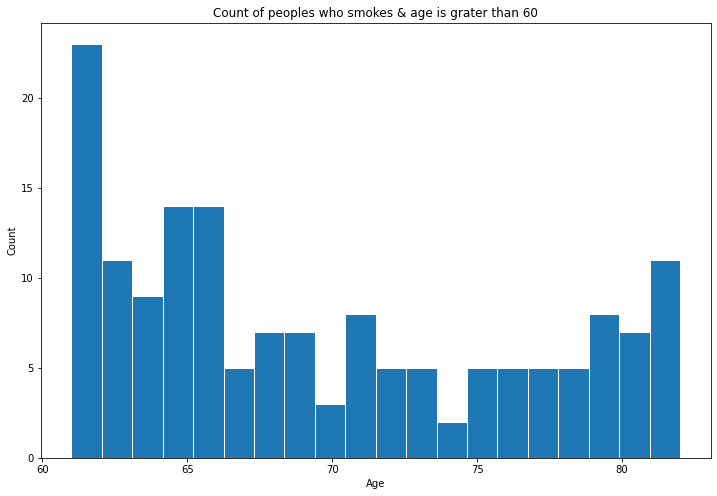

In [54]:
plt.figure(figsize=(12,8))
df.Age[(df['Age'] > 60)&(df['Smoking_Status']=='smokes')].plot(kind='hist',bins=20,edgecolor="w")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count of peoples who smokes & age is grater than 60")
plt.show()

In [55]:
#Count of peoples who smokes and their age is between 25 to 50
df[(df['Age'] > 25)&(df['Smoking_Status']=='smokes')&(df['Age'] < 50)]['Gender'].count()

329

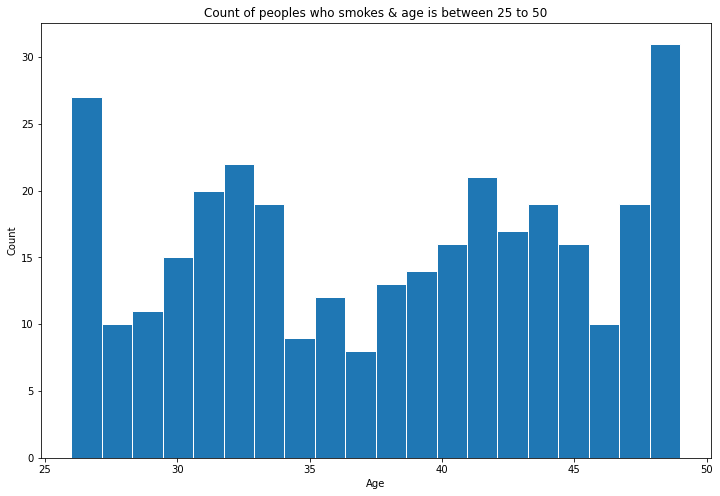

In [56]:
plt.figure(figsize=(12,8))
df.Age[(df['Age'] > 25)&(df['Smoking_Status']=='smokes')&(df['Age'] < 50)].plot(kind='hist',bins=20,edgecolor="w")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count of peoples who smokes & age is between 25 to 50")
plt.show()

In [44]:
#Count of peoples who smokes and their age is less than 18
df[(df['Age'] < 18)&(df['Smoking_Status']=='formerly smoked')]['Gender'].count()

23

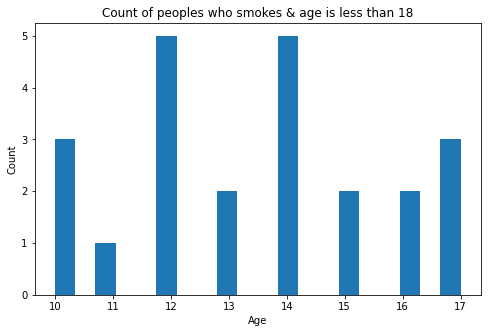

In [57]:
plt.figure(figsize=(8,5))
df.Age[(df['Age'] < 18)&(df['Smoking_Status']=='formerly smoked')].plot(kind='hist',bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count of peoples who smokes & age is less than 18")
plt.show()

In [58]:
#Count of peoples who smokes and their age is less than 18
df[(df['Age'] > 60)&(df['Smoking_Status']=='formerly smoked')]['Gender'].count()

355

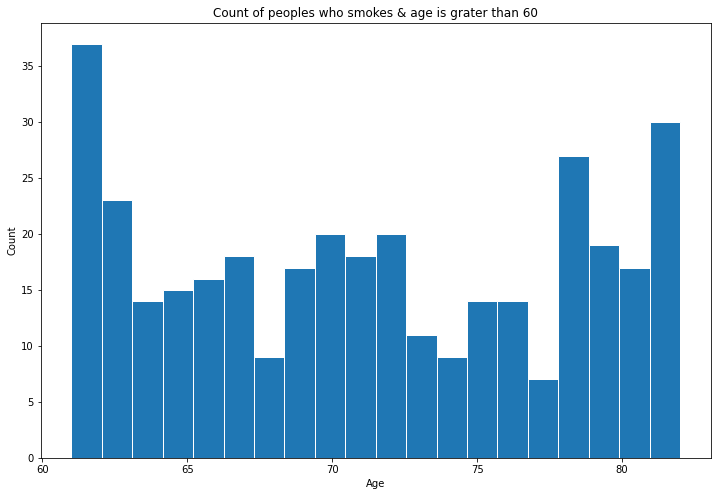

In [59]:
plt.figure(figsize=(12,8))
df.Age[(df['Age'] > 60)&(df['Smoking_Status']=='formerly smoked')].plot(kind='hist',bins=20,edgecolor="w")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count of peoples who smokes & age is grater than 60")
plt.show()

In [61]:
#Count of peoples who smokes and their age is less than 18
df[(df['Age'] > 18)&(df['Smoking_Status']=='Not Mentioned')]['Gender'].count()

790

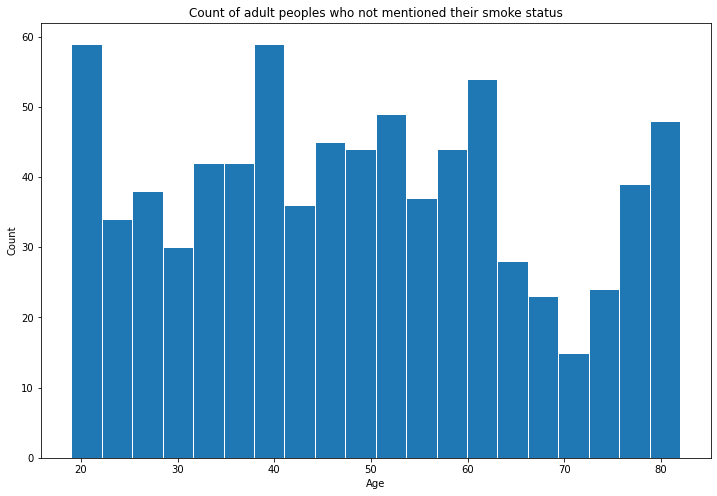

In [62]:
plt.figure(figsize=(12,8))
df.Age[(df['Age'] > 18)&(df['Smoking_Status']=='Not Mentioned')].plot(kind='hist',bins=20,edgecolor="w")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count of adult peoples who not mentioned their smoke status")
plt.show()

## pie representation of data

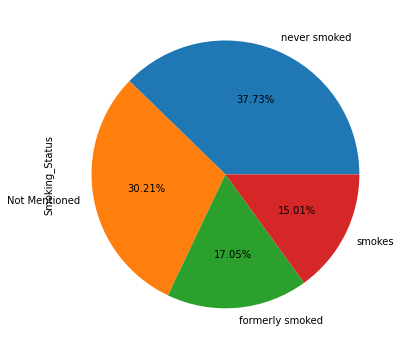

In [63]:
plt.figure(figsize=(6,7))
df['Smoking_Status'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

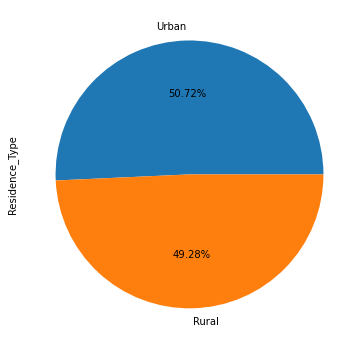

In [64]:
plt.figure(figsize=(6,7))
df['Residence_Type'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

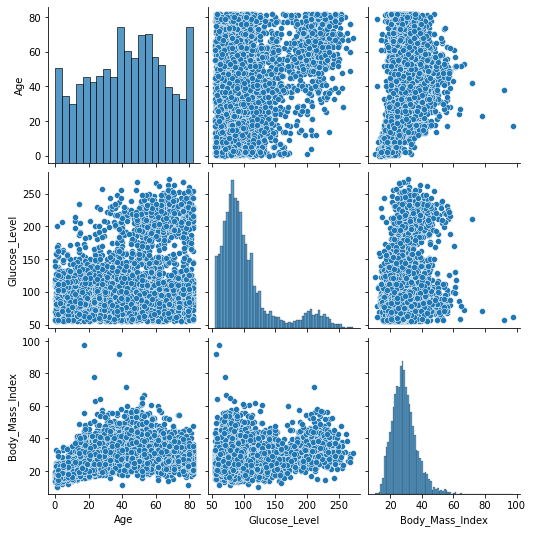

In [65]:
sns.pairplot(data=df)
plt.show()

## boxplot of columns with gives outliers value

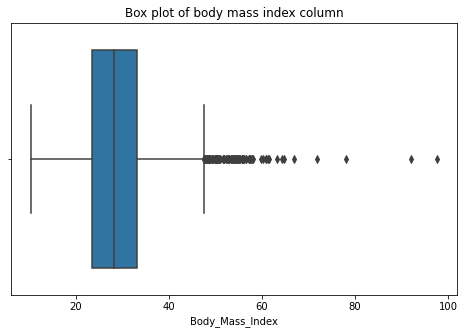

In [66]:
plt.figure(figsize=(8,5))
sns.boxplot(df.Body_Mass_Index)
plt.title('Box plot of body mass index column')
plt.show()

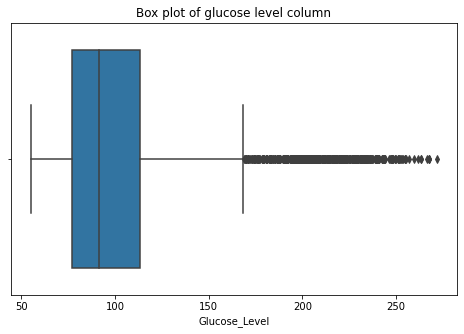

In [67]:
plt.figure(figsize=(8,5))
sns.boxplot(df.Glucose_Level)
plt.title('Box plot of glucose level column')
plt.show()

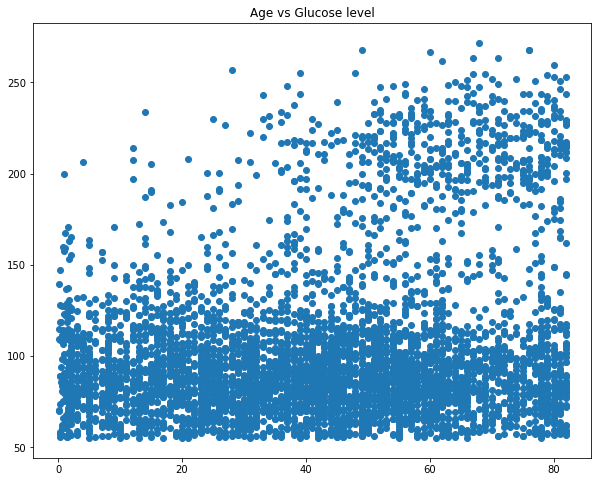

In [68]:
plt.figure(figsize=(10,8))
plt.scatter(df['Age'],df['Glucose_Level'])
plt.title('Age vs Glucose level')
plt.show()

In [69]:
df.Smoking_Status.value_counts()/len(df)*100

never smoked       37.726625
Not Mentioned      30.209819
formerly smoked    17.050316
smokes             15.013241
Name: Smoking_Status, dtype: float64

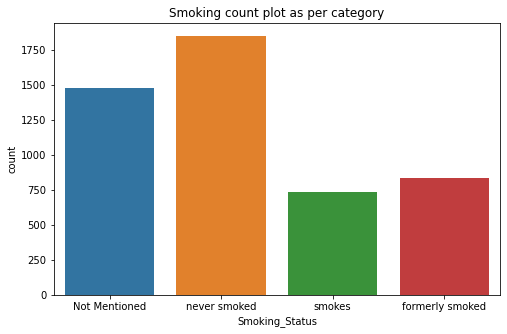

In [70]:
plt.figure(figsize=(8,5))
sns.countplot(df.Smoking_Status)
plt.title('Smoking count plot as per category')
plt.show()

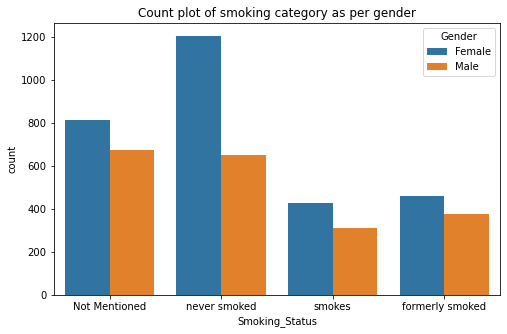

In [71]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Smoking_Status'],hue=df['Gender'])
plt.title('Count plot of smoking category as per gender')
plt.show()

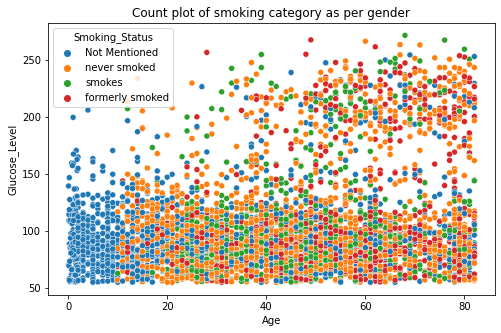

In [72]:
plt.figure(figsize=(8,5))
sns.scatterplot(df['Age'],df['Glucose_Level'],hue=df['Smoking_Status'])
plt.title('Count plot of smoking category as per gender')
plt.show()

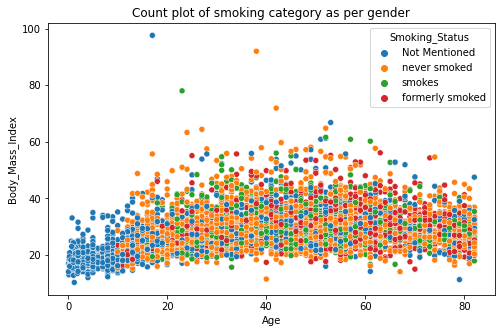

In [73]:
plt.figure(figsize=(8,5))
sns.scatterplot(df['Age'],df['Body_Mass_Index'],hue=df['Smoking_Status'])
plt.title('Count plot of smoking category as per gender')
plt.show()

### corelation between columns

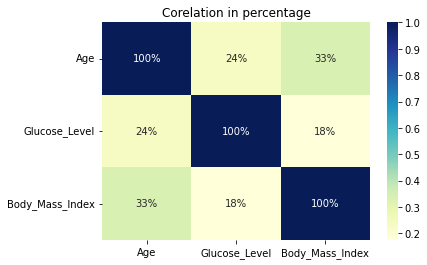

In [74]:
cor = df.corr()
sns.heatmap(cor,annot=True,cmap='YlGnBu',fmt='.0%')
plt.title('Corelation in percentage')
plt.show()

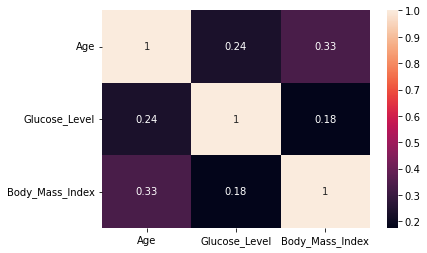

In [75]:
sns.heatmap(cor,annot=True)
plt.show()

## Smoking status residence wise

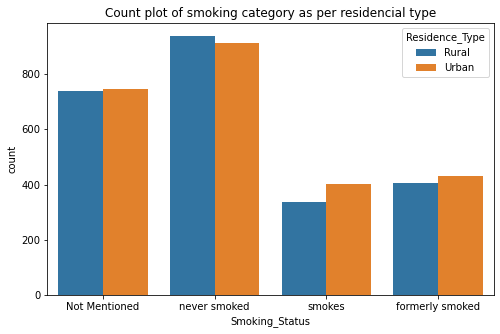

In [63]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Smoking_Status'],hue=df['Residence_Type'])
plt.title('Count plot of smoking category as per residencial type')
plt.show()

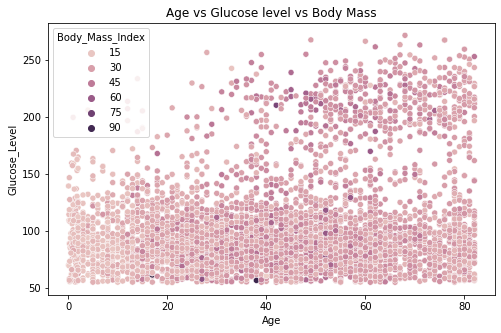

In [76]:
plt.figure(figsize=(8,5))
sns.scatterplot(df['Age'],df['Glucose_Level'],df['Body_Mass_Index'])
plt.title('Age vs Glucose level vs Body Mass')
plt.show()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 1 to 5109
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4909 non-null   object 
 1   Age              4909 non-null   float64
 2   Hypertension     4909 non-null   object 
 3   Heart_Disease    4909 non-null   object 
 4   Ever_Married     4909 non-null   object 
 5   Work_Type        4909 non-null   object 
 6   Residence_Type   4909 non-null   object 
 7   Glucose_Level    4909 non-null   float64
 8   Body_Mass_Index  4909 non-null   float64
 9   Smoking_Status   4909 non-null   object 
 10  Stroke           4909 non-null   object 
dtypes: float64(3), object(8)
memory usage: 460.2+ KB


## Top 10 values in the data as per column

In [78]:
df['Glucose_Level'][:10].sort_values(ascending=False)

4     108.89
3      98.53
6      97.55
9      94.67
14     91.54
2      89.17
13     88.23
8      86.97
1      85.81
12     84.07
Name: Glucose_Level, dtype: float64

In [79]:
df['Body_Mass_Index'][:10].sort_values(ascending=False)

4     52.3
8     42.2
13    37.6
2     31.5
14    31.4
9     28.8
12    27.6
6     26.2
1     18.6
3     18.5
Name: Body_Mass_Index, dtype: float64

In [80]:
df['Age'][:10].sort_values(ascending=False)

14    81.0
2     55.0
13    43.0
3     42.0
8     33.0
4     31.0
6     24.0
9     20.0
12    20.0
1     13.0
Name: Age, dtype: float64

## Smoking Status vs Heart Disease, Hypertension, Stroke

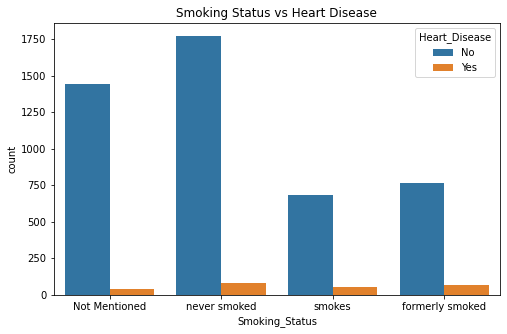

In [81]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Smoking_Status'],hue=df['Heart_Disease'])
plt.title('Smoking Status vs Heart Disease')
plt.show()

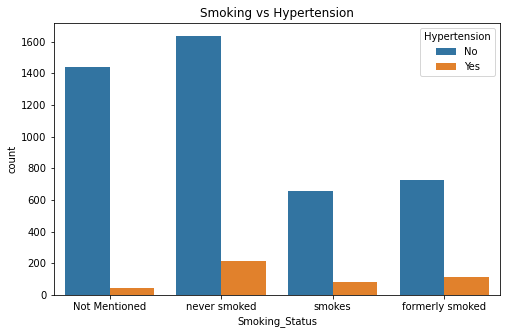

In [82]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Smoking_Status'],hue=df['Hypertension'])
plt.title('Smoking vs Hypertension')
plt.show()

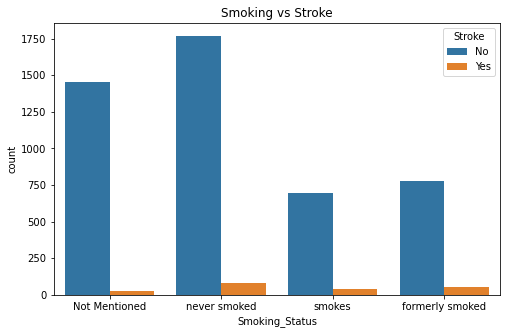

In [71]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Smoking_Status'],hue=df['Stroke'])
plt.title('Smoking vs Stroke')
plt.show()